파이썬 머신러닝 완벽가이드 ch4. 3~6 pg. 211 ~ 243

# 앙상블 학습

앙상블 학습을 통한 분류는 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법이다.

어려운 문제를 해결하기 위해 여러 명의 전문가가 모여서 다양한 의견을 나누고 결정하듯이, 앙상블 학습의 목표는 다양한 분류기의 예측 결과를 결합함으로써 신뢰성이 높은 예측값을 얻는 것이다.

대표격으로는 **랜덤포레스트**와 **그래디언트 부스팅**이 있는데, 이 둘은 뛰어난 성능과 쉬운 사용 등으로 많이 애용되었다.

유형으로는 **보팅**, **배깅**, **부스팅**이 있는데,

보팅과 배깅은 여러개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식이다. 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅은 각 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행하는 것이다.

대표적인 배깅으로 랜덤포레스트가 있다.

- 보팅 : 선형회귀, K neighbors, svm의 알고리즘이 같은 데이터 세트에 대해 학습하고 예측한 결과로 보팅을 해 최종 예측 결과를 선정

- 배깅 : 단일 알고리즘으로 여러 분류기가 학습을 통해 개별예측을 하는데, 학습 데이터는 원본 학습 데이터를 샘플링해 추출된다. 이를 부트스트래핑이라 부른다. 개별 분류기가 부트스트래핑 방식으로 샘플링된 데이터 세트에 대해 학습을 통해 개별적인 예측을 수행한 결과를 보팅을 통해 최종 예측 결과를 선정하는 방식이 배깅 앙상블 방식이다.

- 부스팅 : 여러개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록 다음 분류기에 가중치를 부여하며 학습과 예측을 진행한다. 예측 성능이 뛰어나다.

- 스태킹 : 여러가지 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어 다른 모델로 재학습시켜 결과를 예측한다.

**보팅 유형**

- 하드보팅 : 다수결. 예측한 결괏값들 중 다수의 분류기가 결정한 예측값을 최종으로 선정

- 소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 평균해 이들 중 확률이 가장 높은 레이블 값을 최종으로 선정.

일반적으로 소프트 보팅 사용

**보팅 분류기**

사이킷런의 보팅 방식의 앙상블을 구현한 VotingClassifier 클래스

In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

df= pd.DataFrame(cancer.data, columns=cancer.feature_names)
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 로지스틱 KNN 기반한 소프트 보팅
# 개별 모델
lr_clf = LogisticRegression()
knn_clf =KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN', knn_clf)], voting='soft')
X_train, X_test, y_train, y_test= train_test_split(cancer.data, cancer.target,
                                                   test_size=0.2, random_state=156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도 : 0.9474


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{0} 정확도: {1:.4f}".format(class_name, accuracy_score(y_test, pred)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


보팅 분류기의 정확도가 조금 높게 나타났는데, 보팅으로 여러 개의 기반 분류기를 결합한다고 무조건 예측 성능이 향상되는 것은 아니다.

그럼에도 불구하고 앙상블 방법은 전반적으로 다른 단일 ML알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다. ML 모델의 성능은 이렇게 다양한 테스트 데이터에 의해 검증되므로 높은 유연성으로 현실에 대처할 수 있는지가 중요한 평가 요소가 된다,

앙상블 학습에서는 결정트리 알고리즘의 단점을 매우 많은 분류기를 결합함으로써 다양한 상황을 학습해 극복하고 있다.

# 랜덤포레스트

배깅의 대표적인 알고리즘으로, 비교적 빠른 수행속도와 다양한 영역에서의 높은 예측 성능을 보이고 있다.

랜덤포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 된다.

랜덤포레스트의 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트인데, 이것을 **부트스트래핑**이라 한다.

서브세트의 데이터 건수는 전체 데이터 건수와 동일하지만, 개별 데이터가 중첩되어 만들어진다.

사이킷런의 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원받을 수 있다.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
def get_new_feature_name_df(old_feature_name_df):
  feature_dup_df=pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount()
                              , columns=['dup_cnt'] )
  feature_dup_df=feature_dup_df.reset_index()
  new_feature_name_df=pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
  new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1])
                                                                                          if x[1]>0 else x[0], axis=1)
  new_feature_name_df=new_feature_name_df.drop(['index'],axis=1)
  return new_feature_name_df

In [14]:
def get_human_dataset():
  # 각 데이터 파일은 공백으로 분리 되어ㅣ 있어 read_csv 에서 공백 문자를 sep로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/features.txt'
                                ,sep='\s+',header=None, names=['column_index','column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DF 를 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DF에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습피처와 테스트피처 데이터 DF로 생성.컬럼명은 feature_name 적용
  X_train = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/train/X_train.txt'
                                ,sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/test/X_test.txt'
                                ,sep='\s+', names=feature_name)
  # 학습레이블과 테스트 레이블 데이터 DF로 생성.컬럼명은 action 적용
  y_train = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/train/y_train.txt'
                                ,sep='\s+',header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/데이터/human_activity/test/y_test.txt'
                                ,sep='\s+',header=None, names=['action'])
  return X_train, X_test, y_train, y_test


In [15]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset() 이용
X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred= rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도 : 0.9253


## 랜덤포레스트 하이퍼파라미터 튜닝

트리 기반 앙상블 알고리즘의 단점을 굳이 뽑자면, 하이퍼파라미터가 너무 많고 튜닝을 위한 시간이 많이 소요된다는 것이다. 더구나 많은 시간을 소모했음에도 튜닝 후 예측 성능이 크게 향상되는 경우가 많지 않다.

RF 하이퍼파라미터 : n_estimators, max_features, max_depth, min_samples_leaf

In [16]:
# GridSearchCV 이용한 튜닝
from sklearn.model_selection import GridSearchCV

params ={
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid= params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.9180


멀티 코어 환경에서 n_jobs=-1 파라미터를 통해 모든 cpu 코어를 이용해 학습 가능

In [17]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred= rf_clf1.predict(X_test)
print("예측 정확도:{0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도:0.9165


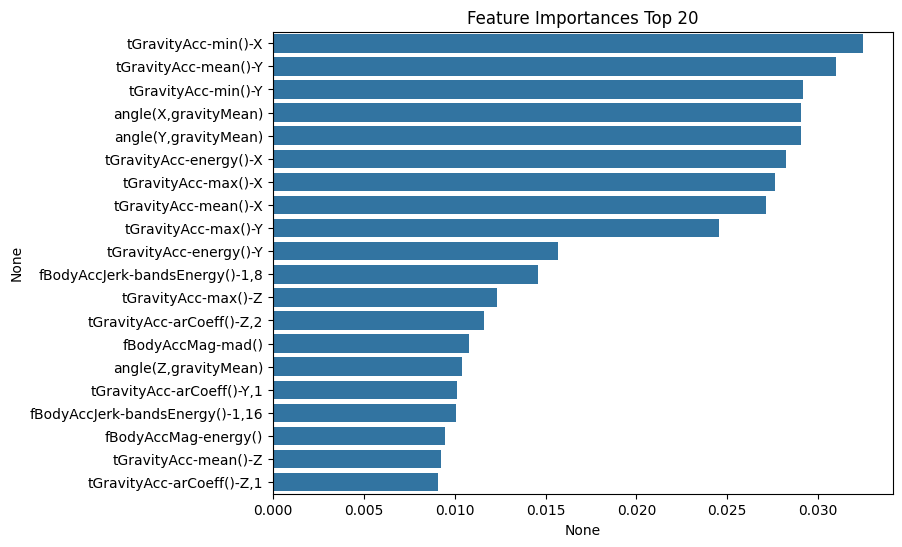

In [19]:
# 피처중요도 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances= pd.Series(ftr_importances_values, index= X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# GBM

부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가며 학습하는 방식이다.

**에이다부스트**는 오류 데이터에 가중치를 부여하며 부스팅을 수행하는 대표적인 알고리즘이다.

**GBM**은 가중치 업데이트를 경사하강법을 이용한다. 오류식을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 한다.

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# 시작시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f}'.format(time.time()-start_time))

GBM 정확도 : 0.9386
GBM 수행 시간 : 1394.9


일반적으로 GBM이 랜포보다는 예측 성능이 뛰어나지만, 수행시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력도 더 필요하다.

## GBM 하이퍼파라미터 튜닝

loss, learning_rate, n_estimators, subsample

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}
grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [ ]:
gb_pred= grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

# XGBoost

뛰어난 예측 성능을 가지지만, 느린 수행시간과 과적합 규제 부재 등의 문제를 해결하였다.

In [ ]:
# 위스콘신 유방암 예측
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset= load_breast_cancer()
X_features = dataset.data
y_label = datasrt.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head(3)

In [ ]:
# 레이블 값 분포 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label,
                                                    test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

In [ ]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest= xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
params={'max_depth':3,
        'eta':0.1,
        'objective':'binary:logistic',
        'eval_metric':'logloss',
        'early_stoppings':100
        }

num_rounds=400

학습 시 XGBoost는 수행 속도를 개선하기 위해 조기중단 기능을 제공한다. 조기 중단은 XGBoost가 수행 성능을 개선하기 위해 더이상 지표 개선이 없을 경우에 num_boost_round 수를 다 채우지 않고 중간에 반복을 빠져나올 수 있게 하는것이다.

early_stopping_rounds 파라미터를 입력해 설정할 수 있는데, 이때 eval_set과 eval_metric이 함께 설정되어야 한다,

- eval_set : 성능 평가를 수행할 평가용 데이터 세트를 설정

- eval_metric : 평가 세트에 적용할 성능평가 방법

In [ ]:
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params, dtrain=dtrain, num_boost_round=num_rounds,
                    early_stopping_rounds=100, evals=wlist)

train으로 학습을 수행하면 반복 시 train-error와 eval-logloss가 지속적으로 감소함.

In [ ]:
pred_probs= xgb_model.predict(dtest)
print('predict() 수행 결괏값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

preds[1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

In [ ]:
get_clf_eval(y_test, preds, pred_probs)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds= xgb_wrapper.predict(X_test)
w_pred_proba= xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='logloss',
                eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

In [ ]:
# early_stopping_rounds 10
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10,
                eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds= xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)